![bank_customer_stock_photo](images/istockphoto-1194242628-612x612.jpg)

# Bank Customers Churn Classification

**Author:** Steve Githinji
***

## Business Understanding

### Overview
Customers discontinuing their relationship with a bank can have significant financial implications for the institution. Identifying customers who are likely to churn in advance can help banks implement targeted retention strategies, thereby reducing customer attrition and maximizing profitability. Machine learning techniques can play a crucial role in predicting customer churn, enabling banks to take proactive measures to retain valuable customers.


***

### Business Problem
The objective of this machine learning project is to develop a classification model that accurately predicts customer churn in the bank. By leveraging historical customer data, including demographics, account information, products and credit cards subscribed, and estimated salary, the model aims to identify patterns and indicators that suggest a higher likelihood of churn. The ultimate goal is to enable the bank to prioritize retention efforts and develop tailored strategies to retain customers at risk of churn.

The key stakeholders in this project are the Bank Executives, Marketing and Retention Team and Customer Service Representives. The study seeks: `"To accurately predict which customers are likely to churn based on their age, location and account information."` 

***

## Data Understanding

We began by importing all the relevant libraries and set the appropriate alias for each.

In [2]:
# IMport relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_selection import (SelectKBest, f_regression)

Below, the CSV containing the Bank Customer Churn data was opened as a pandas DataFrame, and its contents inspected.

In [7]:
# Load dataset
data = pd.read_csv('data/Churn_Modelling.csv', index_col='RowNumber')

# Preview data
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Use the .info() method to get a quick overview of the dataset such as column names and datatypes.

In [8]:
# Dataset overview
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
# Check the summary statistics
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In the cell below, we check to see if there are any NaNs in the data:

In [10]:
# Check for missing values
data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The dataset contains 10,000 entries of customer information and 12 columns. The `CustomerId` and `Surname` columns are data artifacts and may not be useful to our models. `Geography` and `Gender` columns are object datatypes while the rest are float64 and int64 datatypes. The `Exited` column is most likely our target feature while the rest will be the predictors. Below we investigate our target feature.

In [11]:
# Print 'Exited' column value counts
print('Raw counts: \n')
print(data['Exited'].value_counts())
print('Normalized counts: \n')
print(data['Exited'].value_counts(normalize=True))

Raw counts: 

0    7963
1    2037
Name: Exited, dtype: int64
Normalized counts: 

0    0.7963
1    0.2037
Name: Exited, dtype: float64


The `Exited` column has about 80% of the entries as 0 (customers who did not churn) and 20% of entries as 1 (customers who churned). There is some class imbalance here which should be considered during modelling. Next, check the number of unique values in each column.

In [12]:
# Check no. of unique values in each column
data.nunique().sort_values(ascending=False)

CustomerId         10000
EstimatedSalary     9999
Balance             6382
Surname             2932
CreditScore          460
Age                   70
Tenure                11
NumOfProducts          4
Geography              3
Exited                 2
IsActiveMember         2
HasCrCard              2
Gender                 2
dtype: int64

Here investigate the countries to which the customers belong to.

In [13]:
# 'Geography' column value counts
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

50% of the records are for French customers, while the rest are for German and Spanish customers.

Next check salary and account balance ranges for the customers.

In [14]:
# Function that prints salary and balance ranges
def view_salary_balance_range(df, salaries, balances):
    min_sal, max_sal = df[salaries].min(), df[salaries].max()
    min_bal, max_bal = df[balances].min(), df[balances].max()
    print(f"The dataset contains customers whose salaries range from €{min_sal} to €{max_sal}. Their account balances range from €{min_bal} to €{max_bal}.")
    
# Use function to check ranges   
view_salary_balance_range(data, 'EstimatedSalary', 'Balance')

The dataset contains customers whose salaries range from €11.58 to €199992.48. Their account balances range from €0.0 to €250898.09.


## Data Preparation

The prediction target for this analysis is the churn status of a customer, described in the column `Exited`. Therefore the data was separated into X and y accordingly. The `CustomerId` and `Surname` columns are data artifacts and not true features. Therefore they were not included as predictors.

In [15]:
# Drop irrelevant columns  and assign predictors to X
X = data.drop(columns=['Exited', 'CustomerId', 'Surname'], axis=1)

# Assign outcome variable 'Exited' to y
y = data['Exited']

Next, we separate the data into a train set (75% of the full dataset) and a test set (25% of the full dataset) prior to performing any preprocessing steps. This was done before data preparation to avoid data leakage.  The treatment of the test data is therefore as similar as possible to how genuinely unknown data should be treated.

In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

### Categorical Features

If we feed the current `X_train` into our scikit-learn Machine Learning models, it would crash. Hence we converted categorical variable into dummy/indicator variables. Begin by subsetting categorical columns into a new dataframe.

In [17]:
# Subset categorical columns into a new DataFrame 
X_train_categorical = X_train.select_dtypes(exclude=['int64', 'float64']).copy()

# View categorical features
X_train_categorical.columns

Index(['Geography', 'Gender'], dtype='object')

In [18]:
# Get dummy variables and drop one column to avoid collinearity
X_train_ohe = pd.DataFrame(
    pd.get_dummies(X_train_categorical, drop_first=True))

# Preview 
X_train_ohe

,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,
2263,0,0,1
1455,0,1,0
3902,0,1,1
6247,0,0,1
1332,1,0,1
...,...,...,...
1294,0,0,1
4024,0,0,1
7260,0,1,1


### Normalization

This scaling is useful since there are features with different ranges and we want to bring them to a common scale so as to improve the performance of machine learning algorithms that rely on distance calculations or feature comparisons.

In [19]:
# List all numeric columns
numeric_features = ['CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts',
                    'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Subset training numeric features into a new dataframe 
X_train_numeric = X_train[numeric_features].copy()

# Preview last 5 rows
X_train_numeric.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,
1294,641,30,2,87505.47,2,0,1,7278.57
4024,535,38,8,85982.07,1,1,0,9238.35
7260,625,32,7,106957.28,1,1,1,134794.02
5201,512,42,9,93955.83,2,1,0,14828.54
3776,528,22,5,93547.23,2,0,1,961.57


Use the MinMaxScaler to scale the training set.

In [23]:
# Instantiate scaler
scaler = MinMaxScaler()

# Fit the scaler on the numerical data
scaler.fit(X_train_numeric)

# Transform the data and convert to a dataframe
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # Specify index to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)

# Preview dataframe
X_train_scaled.tail(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,
4024,0.370,0.270270,0.8,0.388123,0.000000,1.0,0.0,0.046143
7260,0.550,0.189189,0.7,0.482806,0.000000,1.0,1.0,0.674050
5201,0.324,0.324324,0.9,0.424117,0.333333,1.0,0.0,0.074100
3776,0.356,0.054054,0.5,0.422273,0.333333,0.0,1.0,0.004751


Finally, concatenate the preprocessed Ddtaframes `X_tain_scaled` and `X_train_ohe` to a new dataframe `X_train_full`.

In [24]:
# Concatenate preprocessed data 
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)

# Preview dataframe
X_train_full.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
2263,0.444,0.337838,0.2,0.633911,0.000000,1.0,0.0,0.132222,0,0,1
1455,0.342,0.216216,0.7,0.319280,0.000000,1.0,1.0,0.101183,0,1,0
3902,0.450,0.162162,0.2,0.000000,0.333333,1.0,1.0,0.411140,0,1,1
6247,0.566,0.297297,0.4,0.679710,0.000000,0.0,1.0,0.173331,0,0,1
1332,0.998,0.256757,0.7,0.647546,0.333333,1.0,1.0,0.086430,1,0,1


The same preprocessing process was applied to the test data, so that models' performance can be evaluated on unseen data.

In [25]:
# Subset categorical columns into a new DataFrame 
X_test_categorical = X_test.select_dtypes(exclude=['int64', 'float64']).copy()

# Handling categorical data
X_test_ohe = pd.DataFrame(
    pd.get_dummies(X_test_categorical, drop_first=True))

# Normalization numerical predictors
X_test_numeric = X_test[numeric_features].copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)

# Preview DataFrame
X_test_full.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
7653,0.708,0.081081,0.2,0.668963,0.333333,1.0,0.0,0.914004,0,0,1
7828,0.510,0.310811,1.0,0.000000,0.333333,0.0,1.0,0.486107,0,0,1
5170,0.602,0.175676,0.7,0.622969,0.333333,1.0,0.0,0.649638,1,0,1
9313,0.458,0.297297,1.0,0.204976,0.333333,1.0,0.0,0.093626,1,0,1
4021,0.742,0.324324,0.4,0.464657,0.000000,0.0,0.0,0.005883,0,0,1


## Modelling

### Evaluation Metrics
Precision was chosen as one of the evaluation metrics for the performance of models.  Precision is the ratio between the True Positives and all the Predicted Positives. It allows us to answer the following question:
> "Out of all the times the model said a customer churned, how many times did the customer in question actually churn?"

Interpreting precision on its own can misleading. This is why accuracy was also included as an evaluation metric.Accuracy is intuitive because it allows us to measure the total number of predictions a model gets right, including both True Positives and
True Negatives. It allows us to answer the following question:
> "Out of all the predictions our model made, what percentage were correct?"

The error based metric used was Root Mean Squared Error (RMSE). It was used to measure the average magnitude of the differences between the predicted values and the actual (observed) values. It was also used to measure the level of overfitting in different models by looking at the magnitude of the difference between training set RMSE and testing set RMSE.


### Model 1: Baseline Logistic Regression Model

After preprocessing all the columns, an initial baseline model was built. This model represents a naive reference point for evaluating the performance of more sophisticated models that will be built. It provided a benchmark or starting point for comparison and established initial metrics that other models tried to improve on.

The baseline model used is a Logistic Regression model. In scikit-learn, this is done by first creating an instance of the `LogisticRegression` class. From there, use the `.fit()` method from the class instance to fit a model to the training data.

In [22]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit model on training features
baseline_model_log = logreg.fit(X_train_full, y_train)

How does the model perform on the training and test data?

To answer this, first predict class labels for samples in `X_train_full` and `X_test_full` using the `predict()` method.

In [23]:
# Generate predictions for both sets
y_hat_train = logreg.predict(X_train_full)
y_hat_test = logreg.predict(X_test_full)

To evaluate the model, a function that plots a confusion matrix of the test data predictions was defined. Another function that outputs evaluation metrics was also defined.

In [26]:
# Function that plots confusion matrix
def cnf_matrix(model, y_test, y_test_preds):
    """
    Function takes in a model, label data and its corresponding
    predictions, then plots a confusion matrix
    """
    cnf_matrix = confusion_matrix(y_test, y_test_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)

In [27]:
# Function that outputs evaluation metrics
def print_metrics(y_train, y_hat_train, y_test, y_hat_test):
    """
    Function takes in actual y values and their model predictions
    for training  and test data and outputs precision, accuracy
    and RMSE metrics
    """
    print('Training Precision: ', precision_score(y_train, y_hat_train))
    print('Testing Precision: ', precision_score(y_test, y_hat_test))
    print('\n')
    
    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('\n')
    
    print('Training RMSE:', mean_squared_error(y_train, y_hat_train, squared=False))
    print('Testing RMSE:', mean_squared_error(y_test, y_hat_test, squared=False))

Use the above functions to view classification metrics and plot a confusion matrix. 

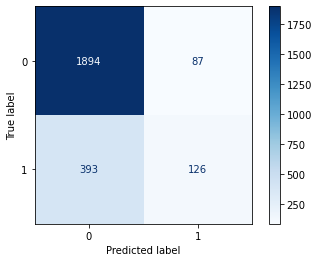

In [26]:
# Call on cnf_matrix function to display model's confusion matrix
cnf_matrix(logreg, y_test, y_hat_test)

In [27]:
# Use print_metrics function to display evaluation metrics
print_metrics(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.5813084112149532
Testing Precision:  0.5915492957746479


Training Accuracy:  0.8092
Testing Accuracy:  0.808


Training RMSE: 0.4368065933568311
Testing RMSE: 0.4381780460041329


The model is mildly overfitting as seen with the slightly `higher Testing RMSE`. The model is about `81% accurate` in its predictions for both the training and test data. It has `precision` scores of `58%` and `59%` on the training and test data respectively. Moving forward, the objective is to improve on these classification metrics. 

The target is an accuracy of 90%, precision of 80% and reduce the RMSE as much as possible. To do this, there was an iteration through several models to try and achieve these targets.

### Model 2: K-Nearest Neighbors

After the baseline model, the first model built using the distance-base K-Nearest Neighbors (KNN) classifier. The default values were used such as `n_neighbors` of 5 and `minkowski` as the distance computation metric.

In [25]:
# Instantiate classifier implementing k-nearest neighbors vote
clf = KNeighborsClassifier()

# Fit the classifier on the training data
clf.fit(X_train_full, y_train)

# Generate predictions to training data/labels
y_train_knn_preds = clf.predict(X_train_full)
y_test_knn_preds = clf.predict(X_test_full)

To evaluate this vanilla KNN model, plot the confusion matrix and display precision, accuracy and RMSE classification metrics.

Training Precision:  0.7844925883694412
Testing Precision:  0.547945205479452


Training Accuracy:  0.8641333333333333
Testing Accuracy:  0.8036


Training RMSE: 0.36860095858077563
Testing RMSE: 0.44317039612320674


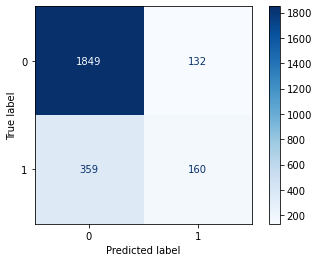

In [28]:
# Compute evaluation metrics
print_metrics(y_train, y_train_knn_preds, y_test, y_test_knn_preds)

# Plot confusion matrix of test set
cnf_matrix(clf, y_test, y_test_knn_preds)

This model did not show an improvement in the test set compared to the baseline model. This might be because only the default hyperparameters were used. In the next model, a more advanced method was used to search for the optimmum hyperparameters.

### Model 3: K-Nearest Neighbors with Parameter Tuning

Here we try to improve the performance of the KNN model. This was done by finding an optimal value of K through some iterative investigation. The best way to find an optimal value for K is to choose a minimum and maximum boundary and try them all!

In [28]:
# Instantiate the model
knn = KNeighborsClassifier()

# Define a range for K values
k_range = list(range(1, 31))

# Add K values to be iterated to a dictionary
param_grid = dict(n_neighbors=k_range)

# Instantiate GridSearchClass
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# Fitting the model for grid search
grid_search=grid.fit(X_train_full, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.3min finished


Once the model is fit, we can find the optimal parameter of K and the best score obtained through GridSearchCV.

In [29]:
# Use best_params_ method to parameters for this estimator
print(grid_search.best_params_)

# Get mean cross-validated score of the best_estimator
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 7}
Accuracy for our training dataset with tuning is : 81.88%


After parameter tuning, we now have the best hyperparameter of K=7, this can be used to fit a KNN model and check its accuracy on the unseen test dataset.

In [30]:
# Instantiate the model
knn_k_7 = KNeighborsClassifier(n_neighbors=7)

# Fit model on the training data
knn_k_7.fit(X_train_full, y_train)

# Predict training
y_train_k7_preds = knn_k_7.predict(X_train_full)

# Predict test
y_test_k7_preds = knn_k_7.predict(X_test_full)

To evaluate this tuned KNN model, plot the confusion matrix and display precision, accuracy and RMSE classification metrics.

In [32]:
# Compute evaluation metrics
print_metrics(y_train, y_train_k7_preds, y_test, y_test_k7_preds)

Training Precision:  0.7694300518134715
Testing Precision:  0.5714285714285714


Training Accuracy:  0.8530666666666666
Testing Accuracy:  0.8072


Training RMSE: 0.3833188403057347
Testing RMSE: 0.43908996800200295


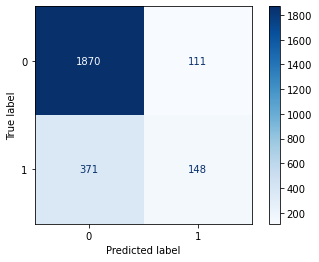

In [33]:
# Plot confusion matrix of test set
cnf_matrix(knn_k_7, y_test, y_test_k7_preds)

There is an improvement in performance on the test data evaluation metrics. Precision increased from 54% to 57%, accuracy from 80% to 81% while RMSE reduced from 0.44 to 0.43. Parameter tuning seems to have a had a positive effect on model performance.

Next, ensemble methods were used to try and improve these metrics.


### Model 5: Random Forest with Tuned Hyperparameters

Here an attempt was made to find the optimum parameters to use in the model. First, a the param_grid dictionary was defined. In this dictionary, each key represents a parameter we want to tune and each corresponding value is a list of every parameter value we'd like to check for that parameter.

In [28]:
# Instantiate and fit a RandomForestClassifier 
forest = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=23)

# Dictionary of parameters to tune
rf_param_grid = {
    "n_estimators": [40, 50, 75],
    "criterion": ["gini", "entropy"],
    "max_depth": [5],
    "min_samples_split": [2, 4, 10],
    "min_samples_leaf": [1, 3]}

K-Fold cross-validation was implemented during this step. Set K = 3, meaning that 3 different models were trained for each unique combination of parameters.

How many different decision trees will GridSearchCV have to train in order to try every possible combination and find the best parameter choices?

In [29]:
# Compute number of models iterated over to get best combination
num_decision_trees = 3 * 3 * 2 * 1 * 3 * 2

print(
    f"Grid Search will have to search through {num_decision_trees} different permutations."
)

Grid Search will have to search through 108 different permutations.


Tune the model parameters through an exhaustive search by instantiating and fitting the GridSearchCV class.

In [89]:
# Instantiate model to be tuned
rf = RandomForestClassifier(random_state=23)

# Instantiate and fit GridSearchCV to training data
rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3, scoring=None)
rf_grid_search.fit(X_train_full, y_train)

# Print parameter setting that gave the best results and its score
print(f"Training Accura: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accura: 85.37%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 40}


Using the optimal parameters from the search above, instantiate a RandomForestClassifier, fit it on the training set and generate predictions.

In [90]:
# Instantiate the model with optimized hyperparameters
rf_tuned = RandomForestClassifier(criterion='gini', max_depth=5,
                                  min_samples_leaf=3, min_samples_split=10, 
                                  n_estimators=40, random_state=23)

# Fit the model on the training data
rf_tuned.fit(X_train_full, y_train)

# Generate predictions
y_train_rf2_preds = rf_tuned.predict(X_train_full)
y_test_rf2_preds = rf_tuned.predict(X_test_full)

Plot a confusion matrix and display precision, accuracy and RMSE classification metrics to evaluate performance of the model.

Training Precision:  0.8868613138686131
Testing Precision:  0.875


Training Accuracy:  0.8541333333333333
Testing Accuracy:  0.85


Training RMSE: 0.3819249489974001
Testing RMSE: 0.3872983346207417


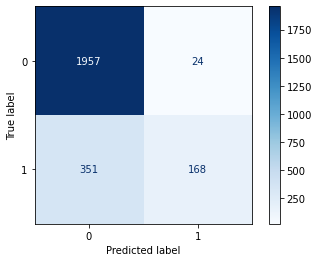

In [91]:
# Compute evaluation metrics
print_metrics(y_train, y_train_rf2_preds, y_test, y_test_rf2_preds)

# Plot confusion matrix of test set
cnf_matrix(rf_tuned, y_test, y_test_rf2_preds)

There is an increase in accuracy but a decrease in precision. There is a noticeable increase in overfitting in this model as seen in the increase in the difference between training and test set metrics. 

### Model 5: Random Forest with Tuned Hyperparameters & Feature Selection

To reduce overfitting, feature selection was done below using a Filter Method called `SelectKBest`. This transformer uses a particular statistic to compare features to the target one by one. Then it selects the top `k` features based on this statistic. The default `k` is 10.
Below `f_regression` statistic was tried.

In [32]:
# Create an instance of SelectKBest with f_regression scoring function
selector = SelectKBest(score_func=f_regression, k=9)

# Fit and transform the feature selector to the data
X_train_k_best = selector.fit_transform(X_train_full, y_train)

# Transform the testing data
X_test_k_best = selector.transform(X_test_full)

X_test_k_best.shape

(2500, 9)

`X_train_k_best` and `X_test_k_best` now contain our top k features. Next create an instance of `GridSearchCV`, passing the random forest classifier and the parameter grid. We also specify cv=3 to perform 3-fold cross-validation.

Then fit the grid search to the training data using the fit method. This will perform an exhaustive search over the specified parameter grid, training and evaluating the random forest classifier for each parameter combination. After the grid search is complete, retrieve the best parameter combination using best_params_ and its score using best_score_ method.

In [33]:
# Create a random forest classifier
rf3 = RandomForestClassifier(random_state=23)

# Create an instance of GridSearchCV
rf3_grid_search = GridSearchCV(rf3, rf_param_grid, cv=3)

# Fit the grid search to the training data
rf3_grid_search.fit(X_train_k_best, y_train)

# Print the best parameter combination and its score
print(f"Training Accuracy: {rf3_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf3_grid_search.best_params_}")

Training Accuracy: 86.01%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Use the optimized hyperparameters from the GridSearch to build a model.

In [96]:
# Create a random forest classifier
rf3_tuned = RandomForestClassifier(criterion='entropy', max_depth=5,
                                  min_samples_leaf=1, min_samples_split=2, 
                                  n_estimators=50, random_state=23)

# Fit classifier on training data
rf3_tuned.fit(X_train_k_best, y_train)

# Generate predictions
y_train_rf3_preds = rf3_tuned.predict(X_train_k_best)
y_test_rf3_preds = rf3_tuned.predict(X_test_k_best)

Plot a confusion matrix and display precision, accuracy and RMSE classification metrics to evaluate performance of the model.

Training Precision:  0.8569321533923304
Testing Precision:  0.819672131147541


Training Accuracy:  0.8621333333333333
Testing Accuracy:  0.8548


Training RMSE: 0.37130400841718186
Testing RMSE: 0.381051177665153


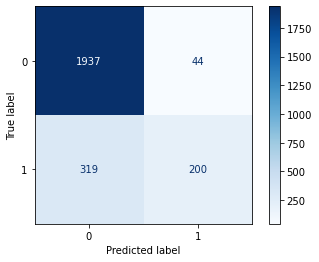

In [97]:
# Compute evaluation metrics
print_metrics(y_train, y_train_rf3_preds, y_test, y_test_rf3_preds)

# Plot confusion matrix of test set
cnf_matrix(rf3_tuned, y_test, y_test_rf3_preds)

There is a slight decrease in overfitting in this model as seen in the decrease in the difference between training and test RMSE. Testing set accuracy and precision have increased slightly.

## Results

This project took an iterative approach to modeling by building multiple models. It began with a basic Logistic Regression model and subsequently built more models to improve on it. To appropriately choose a final model, all the classification metrics are plotted below to visually compare performance.

Below is a plot of precion and accuracy of testing data for all the models.

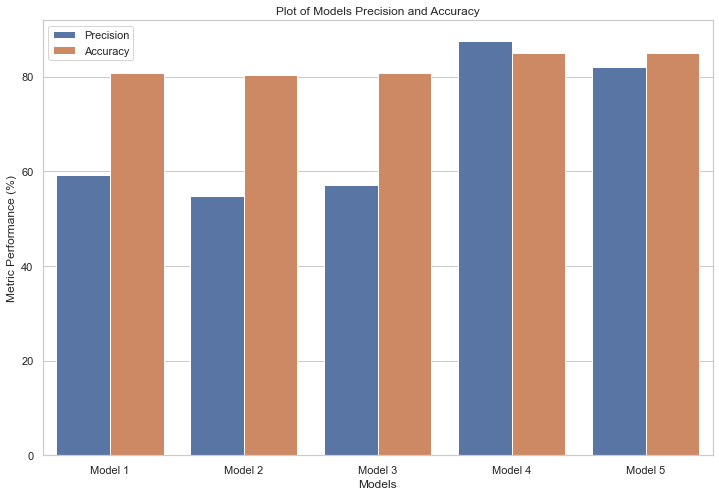

In [7]:
# Create a dataframe containing performance metricse for testing data
data = {'Category': ['Model 1', 'Model 1', 'Model 2', 'Model 2', 'Model 3','Model 3',
                     'Model 4', 'Model 4', 'Model 5', 'Model 5'],
        'Group': ['Precision', 'Accuracy', 'Precision', 'Accuracy', 'Precision', 'Accuracy',
                 'Precision', 'Accuracy', 'Precision', 'Accuracy'],
        'Value': [59.2, 80.8, 54.8, 80.4, 57.1, 80.7, 87.5, 85, 82, 85]}
df = pd.DataFrame(data)

# Plot grouped barplot using Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))

sns.barplot(x='Category', y='Value', hue='Group', data=df)
plt.xlabel('Models')
plt.ylabel('Metric Performance (%)')
plt.title('Plot of Models Precision and Accuracy')

plt.legend(loc='upper left')
plt.show()

Below plot a barplot of RMSEs of all the models.

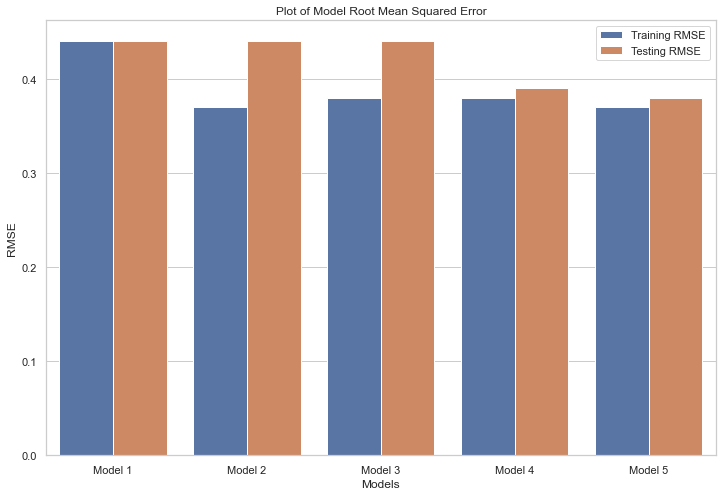

In [8]:
# Create a dataframe of model RMSEs
data = {'Category': ['Model 1', 'Model 1', 'Model 2', 'Model 2', 'Model 3','Model 3',
                     'Model 4', 'Model 4', 'Model 5', 'Model 5'],
        'Group': ['Training RMSE', 'Testing RMSE', 'Training RMSE', 'Testing RMSE', 'Training RMSE', 'Testing RMSE',
                 'Training RMSE', 'Testing RMSE', 'Training RMSE', 'Testing RMSE'],
        'Value': [0.44, 0.44, 0.37, 0.44, 0.38, 0.44, 0.38, 0.39, 0.37, 0.38]}
df = pd.DataFrame(data)

# Plot grouped barplot using Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))

sns.barplot(x='Category', y='Value', hue='Group', data=df)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Plot of Model Root Mean Squared Error')

plt.legend()
plt.savefig('modelrmse')
plt.show()

Looking at the precision and accuarcy plot, model 4 had the highest accuracy and precision. In the RMSE plot, model 4 had the least amount of overfitting since it had fairly similar training and test RMSE.

**`Model 4`** is therefore selected as the `final model`. It is an ensemble algorithm that used a `Random Forest Classifier`. It had the highest combined accuracy and precision and the least amount of overfitting. Model 4 had an accuracy of about 85% meaning that out of all the predictions this model made, 85% were correct. It had a precision of 87.5% meaning that out of  all the times the model said a customer churned, the customer in question actually churned 87.5% of the time.

## Conclusion

In conclusion, the final model demonstrated the power and effectiveness of analyzing the Bank Customer Churn dataset and predicting customer churn. Through careful hyperparameter tuning and model selection , a robust classification model capable of accurately predicting customer churn was successfully developed. 

An analysis and evaluation of various machine models i.e. logistic regression, K-nearest neighhbors, decision trees and random forests, provided valuable insights into theirt performance. Ultimately, model 4, a random forest model, was chosen as the most suitable choice, delivering the best performance metrics, including high accuracy and precision. By splitting the dataset into training and testing sets, the model's performance was validated on unseen data, minimizing the risk of overfitting. By using a Random Forest algorithm, various individual decision trees were built on different samples and their majority vote taken as the prediction. The model employed scikit-learn's GridSearchCV tor perform hyperparameter tuning and model selection. It automated the process of exhaustively searching through a specified hyperparameter grid to find the best combination of hyperparameters for the given estimator. Cross-validation was done to ensure the generalizability of the model.

The deployment of this classification model has the potential to offer tangible benefits to the bank executives. By automating the process of categorizing new instances based on historical bank customer data, this model can assist the executives make decisions on proactive measures to take to mitigate customer churn such as targeted advertising and offers.

Nevertheless, it is essential to acknowledge the limitations of this study. These include class imbalance, overfitting and limited training data. Additionally, as the nature of the problem and data evolve, the model should be regularly re-evaluated and updated with more current data to maintain its efficacy.

In conclusion, our Random Forest classification model has demonstrated its capability to accurately classify customer churn instances based on the provided features. Its performance, generalizability, and potential for real-world application by the bank executives make it a valuable tool for decision-making processes.